<h1 align=center><font size = 5>Analisis de mortalidad </font></h1>


## Introduccion
En este trabajo se realizo un analisis de una base de datos de la mortalidad en Inglaterra y Gales dividido por sexo utilizando el algoritmo de agrupacion Kmeans y dar una conclusion a los resultados 

### Data
La base de datos fue encontrada en la pagina https://www.makeovermonday.co.uk/data/ y descargada y visualizada de mejor manera desde https://data.world/makeovermonday/2021w32. Los datos fueron recopilidos por la <b>ONS</b>. <br>
Los datos hablan de la mortalidad del mes de junio a lo largo de los años en los paises Inglaterra y Gales.

## Metodologia


#### Instalando Librerias

In [48]:
import pandas as pd
import seaborn as sb

from sklearn.cluster import KMeans

#### Se importa al programa la base de datos

In [49]:
dataset = pd.read_csv('./in/Mortality-Rates-in-England-and-Wales.csv')
x = dataset.drop(['Period'], axis=1 )

#### Se hace uso del algoritmo de Kmeans con dos clusters y el resultado se guarda en un archivo nuevo 

In [51]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(x)
dataset['grupo'] = kmeans.predict(x) 
dataset.to_csv('./out/groups.csv', index=False, header=True)

grouped_df = dataset.groupby(['grupo']) 

## Resultado
#### Se imprime el resultado

In [52]:
for key, group in grouped_df:
    print(grouped_df.get_group(key), "\n\n", '='*180)  

print('El Archivo "groups.csv" ha sido creado con éxito en la carpeta "out".')

    Period  Males - England  Females - England  Males - Wales  \
6   Jun-07           1184.2              851.4         1287.4   
7   Jun-08           1175.5              839.5         1233.3   
8   Jun-09           1192.5              837.1         1241.5   
9   Jun-10           1190.8              859.1         1239.2   
10  Jun-11           1171.0              830.8         1283.4   
11  Jun-12           1031.4              764.5         1075.1   
12  Jun-13            993.6              727.8         1094.7   
13  Jun-14           1063.2              749.3         1082.0   
14  Jun-15           1107.2              828.8         1228.0   
15  Jun-16           1101.7              811.8         1133.3   
16  Jun-17           1078.4              795.4         1135.2   
17  Jun-18           1007.4              734.4         1112.8   
18  Jun-19            969.4              687.1         1003.6   
19  Jun-20           1030.9              766.3         1116.6   
20  Jun-21            987

#### Grafica por agrupacion del resultado

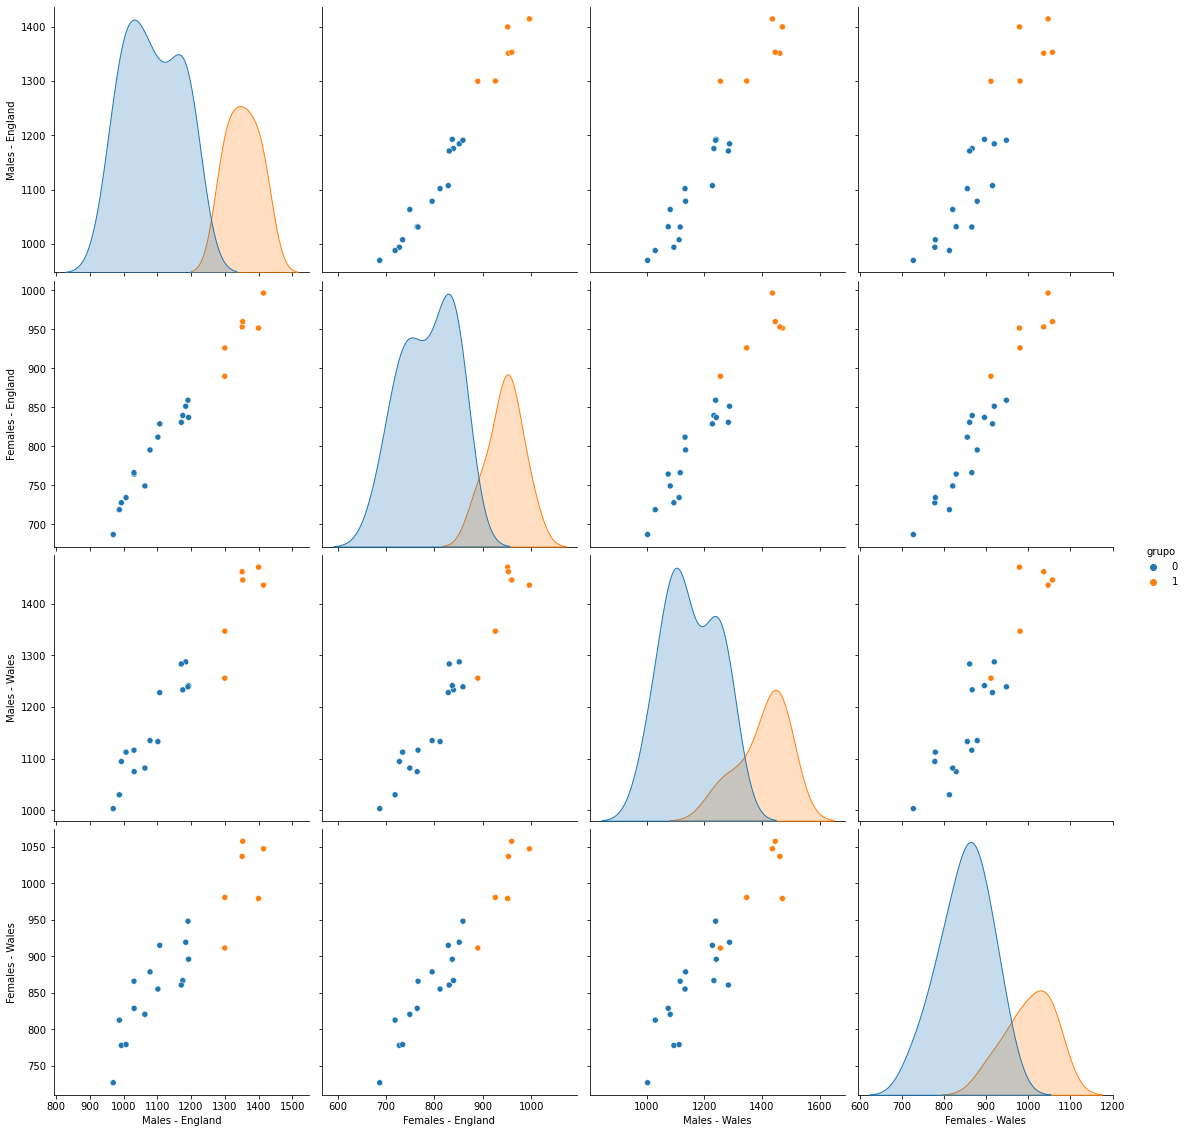

In [65]:
df = pd.read_csv ('./out/groups.csv')
sb.pairplot(df.dropna(), hue='grupo',height=4,vars=["Males - England","Females - England","Males - Wales", "Females - Wales"],kind='scatter')

## Concluciones
Podemos obserbar en las tablas y en las graficas que los grupos que se crearon fueron en base a la cantidad de muertes en ambos paises dando como resultado en algunas relaciones grupos muy bien definido para analisis y otros pocos no tan bien definidos. Si nos basamos en las tablas podemos observar que antes ubieron mas decesos y que con el tiempo fueron dismunuyendo un poco hasta la actualidad en ambos paises.

## Referencias
https://data.world/makeovermonday/2021w32 <br>
https://www.makeovermonday.co.uk/data/ <br>